In [1]:
#Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [2]:
#Reading CSV File
data=pd.read_csv("C:/Users/Prithvi/Desktop/Academics/values.csv")

In [3]:
#Removing Unwanted Rows
d=data['State'].count()
c=0
a=[]
for i in range(d):
    if(data['Months Since Policy Inception'][i]<data['Months Since Last Claim'][i] and data['Number of Policies'][i]==1):
        c=c+1
        a.append(i)
print(c)
data.drop(a,axis=0,inplace=True)
data = data.reset_index(drop=True)

521


In [4]:
#Removing Unwanted Rows
b=[]
d=0
for i in range(data['Customer Lifetime Value'].count()):
    if(data['Customer Lifetime Value'][i]>30000):
        d=d+1
        b.append(i)
print(d)
data.drop(b,axis=0,inplace=True)
data = data.reset_index(drop=True)

189


In [5]:
#Label encoding Columns
le = preprocessing.LabelEncoder()
data['State']=le.fit_transform(data['State'])
data['Education']=le.fit_transform(data['Education'])
data['EmploymentStatus']=le.fit_transform(data['EmploymentStatus'])
data['Location Code']=le.fit_transform(data['Location Code'])
data['Marital Status']=le.fit_transform(data['Marital Status'])
data['Policy Type']=le.fit_transform(data['Policy Type'])
data['Policy']=le.fit_transform(data['Policy'])
data['Renew Offer Type']=le.fit_transform(data['Renew Offer Type'])
data['Sales Channel']=le.fit_transform(data['Sales Channel'])
data['Vehicle Class']=le.fit_transform(data['Vehicle Class'])
data['Vehicle Size']=le.fit_transform(data['Vehicle Size'])
data['Coverage']=le.fit_transform(data['Coverage'])
data['Gender']=le.fit_transform(data['Gender'])
data['Response']=le.fit_transform(data['Response'])
data.head()



,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,QZ44356,0,6979.535903,0,1,0,1/31/2011,4,0,0,...,42,0,8,1,5,2,0,1131.464935,0,1
1,AI49188,2,12887.431650,0,2,0,2/19/2011,1,0,48767,...,38,0,2,1,5,0,0,566.472247,5,1
2,WW63253,1,7645.861827,0,0,0,1/20/2011,4,1,0,...,65,0,7,0,1,0,2,529.881344,3,1
3,HB64268,4,2813.692575,0,0,0,2/3/2011,1,1,43836,...,44,0,1,1,3,0,0,138.130879,0,1
4,OC83172,3,8256.297800,1,0,0,1/25/2011,1,0,62902,...,94,0,2,1,5,1,3,159.383042,5,1


In [6]:
#Dropping Unwanted Columns found out using f-regression
data.drop(['Customer','Effective To Date','Sales Channel','Location Code'],axis=1,inplace=True)
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,6979.535903,0,1,0,4,0,0,2,94,13,42,0,8,1,5,2,1131.464935,0,1
1,2,12887.431650,0,2,0,1,0,48767,1,108,18,38,0,2,1,5,0,566.472247,5,1
2,1,7645.861827,0,0,0,4,1,0,1,106,18,65,0,7,0,1,0,529.881344,3,1
3,4,2813.692575,0,0,0,1,1,43836,2,73,12,44,0,1,1,3,0,138.130879,0,1
4,3,8256.297800,1,0,0,1,0,62902,1,69,14,94,0,2,1,5,1,159.383042,5,1


In [7]:
#Splitting features and prediction values
y=data['Customer Lifetime Value']
x=data.drop('Customer Lifetime Value',axis=1)

In [8]:
#Splitting Train-Test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=1) 

Variance score: 0.14996564155273873


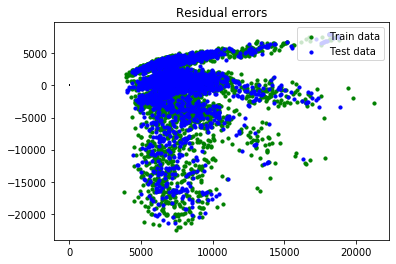

In [9]:
#Applying Linear Regression
reg = linear_model.LinearRegression() 
reg.fit(X_train, y_train) 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 


In [10]:
#Applying Decision Tree Regressor
regressor = DecisionTreeRegressor(criterion='mse',max_depth=6)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test,y_pred)

0.7360896479605621

In [11]:
#Applying Random Forests Regressor
from sklearn.ensemble import RandomForestRegressor 
regressorf = RandomForestRegressor(n_estimators = 100, random_state = 1,max_depth = 10)
regressorf.fit(X_train, y_train) 
y_pred = regressorf.predict(X_test)
r2_score(y_test,y_pred)


0.7665864312375574

In [27]:
#Applying XGBoost
from xgboost import XGBRegressor 
my_model = XGBRegressor(n_estimators = 100,random_state = 1,max_depth=7) 
my_model.fit(X_train, y_train) 
y_pred = my_model.predict(X_test) 
r2_score(y_test,y_pred)

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:35:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.767780642589586